# Wheat Grain clustering

In [14]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import pandas
import pandas as pd

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# Import TSNE
from sklearn.manifold import TSNE



![Wheat](https://modernfarmer.com/wp-content/uploads/2015/08/harvesting-grains-1200x731.jpg)

## setup dataset

In [22]:
seeds_df = pd.read_csv('seeds.csv')

column_names = ['measure1', 'measure2','measure3','measure4','measure5','measure6','measure7','type']

seeds_df.columns = column_names

X_seeds_df = seeds_df.drop('type', axis=1)
samples = X_seeds_df.to_numpy()

grain_type = seeds_df['type']

seeds_df2 = pd.read_csv('seeds-width-vs-length.csv', header=None)

samples2 = seeds_df2.to_numpy()

## Find best cluster number

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

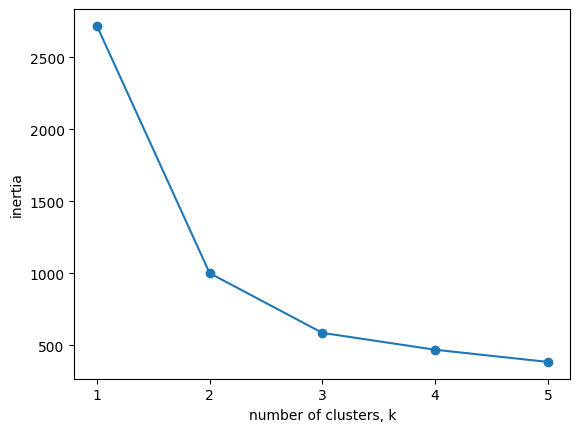

In [8]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Evaluating the grain clustering

In [10]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'type': grain_type})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['type'])

# Display ct
print(ct)

type     1   2   3
labels            
0        1  60   0
1        9   0  68
2       59  10   2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical clustering of the grain data

In [10]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

samples_variety = samples[:42]

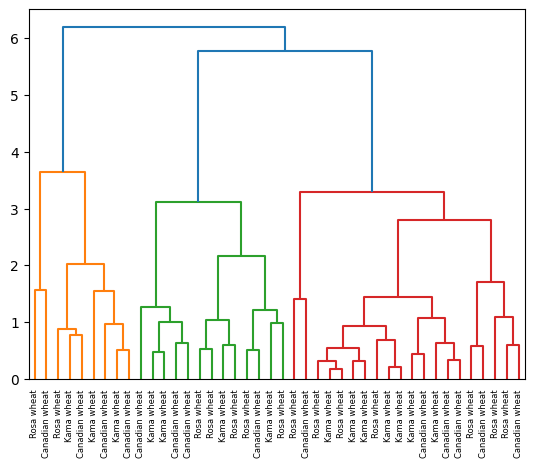

In [11]:
# Calculate the linkage: mergings
mergings = linkage(samples_variety, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [28]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       4           3           2
2                      10          11          12


## Result
The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.